# Supermarket Sales Analysis

## 1. Introduction

Supermarket is a type of business that has a huge amount of data due to the diversity of products sold and also the number of people that goes to the market. The analysis of a great amount of data is a hard task to do if people are not used to make this type of role with certain frequency. That's why a Data Scientist or Data Analyst is essencial to get all the useful information form this data to convert them in good financial results to company.

Throught the data, it's possible understand how all the variables are related, and also how they impact the value of each other. Having this purpose in mind, in this project it will be done a deep analysis of the information of the dataset, and what relavant information can be gotten from it. Also the relashion between the variables can be found.


Attribute information:

- Invoice id: Computer generated sales slip invoice identification number
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in dollar
- Quantity: Number of products purchased by customer
- Tax: 0.05 tax fee for customer buying
- Total: Total price including tax
- Date: Date of purchase (Record available from January 2019 to March 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage
- Gross income: Gross income
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)

## 2. Libraries importing

After the definition and the having in mind the purpose of this project , the first thing to do is the import all the libraries that will help to achieve our goals.

In [21]:
#Time series prediction
#from fbprophet import Prophet

In [61]:
#Data visualizantion and manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Statistics
from scipy.stats import f
from scipy.stats import f_oneway


# Warning filter
import warnings
warnings.filterwarnings('ignore')

## 3. Data Importing

In the section it will be imported the dataset received from the company and it will be observed the content inside it.

In [3]:
#Importing the data
data = pd.read_csv('data.csv')
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
#Getting general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

As the ID hasn't influence on the analisys, this column will be removed.

In [5]:
#Dropping ID collumn
data = data.drop('Invoice ID', axis = 1)

In [6]:
#Converting Time column format to make pandas understand this column info
data['Time'] = pd.to_datetime(data['Time'])
data['Time'] = data['Time'].dt.hour

In [7]:
#Converting Data column format to make pandas understand this column info
data['Date'] = pd.to_datetime(data['Date'])

In [8]:
#Creating a week day column
data ['WeekDay'] = data['Date'].dt.weekday

In [9]:
wd = {0:'Monday',
      1: 'Tuesday',
      2: 'Wednesday',
      3: 'Thursday',
      4: 'Friday',
      5: 'Saturday',
      6: 'Sunday'
     }

data['WeekDay'] = data['WeekDay'].map(wd)

In [10]:
#Checking the changes made
data

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,WeekDay
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10,Cash,76.40,4.761905,3.8200,9.6,Friday
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10,Ewallet,604.17,4.761905,30.2085,5.3,Friday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13,Ewallet,40.35,4.761905,2.0175,6.2,Tuesday
996,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17,Ewallet,973.80,4.761905,48.6900,4.4,Saturday
997,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13,Cash,31.84,4.761905,1.5920,7.7,Saturday
998,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15,Cash,65.82,4.761905,3.2910,4.1,Friday


In [11]:
#General distribution information of the content of each column
for col in data.columns:
    print(data[col].value_counts())

A    340
B    332
C    328
Name: Branch, dtype: int64
Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64
Member    501
Normal    499
Name: Customer type, dtype: int64
Female    501
Male      499
Name: Gender, dtype: int64
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64
83.77    3
64.08    2
32.32    2
21.58    2
45.38    2
        ..
94.64    1
60.96    1
26.31    1
89.20    1
19.25    1
Name: Unit price, Length: 943, dtype: int64
10    119
1     112
4     109
7     102
5     102
6      98
9      92
2      91
3      90
8      85
Name: Quantity, dtype: int64
22.4280    2
8.3770     2
13.1880    2
4.4640     2
9.0045     2
          ..
13.2945    1
2.7180     1
23.0725    1
27.6115    1
8.0625     1
Name: Tax 5%, Length: 990, dtype: int64
175.9170    2
829.0800    2
189.0945    2
470.9880    2
93.7440

## 4. Data Cleaning

It will be done the cleaning of the data, all the missing value problem, duplicated values will be solved and it will be analyzed all the data distribution. It will the also checked the existence of outliers.

In [12]:
#Checking for missing values
data.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
WeekDay                    0
dtype: int64

As shown above, there is no missing value on this dataset.

In [13]:
#Checking for duplicated information
data.duplicated().sum()

0

As shown above, there is no duplicated information on this dataset

In [14]:
#Getting the columns with numerical content
numerical_attributes = data.select_dtypes(['int64','float64']).columns
numerical_attributes

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'Time', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

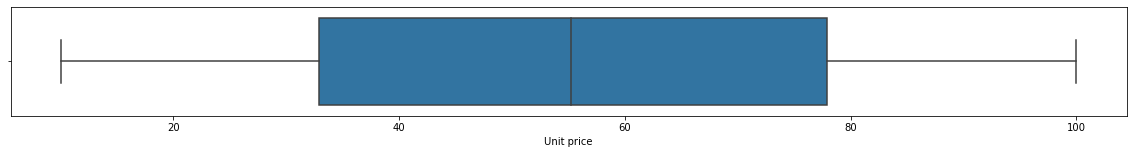

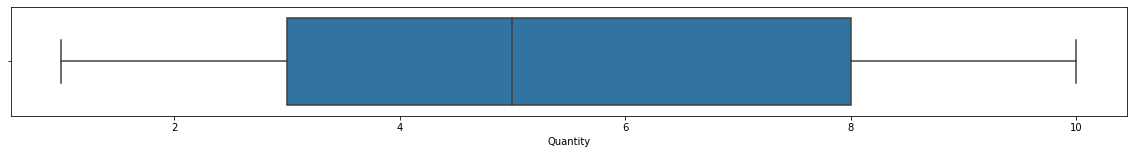

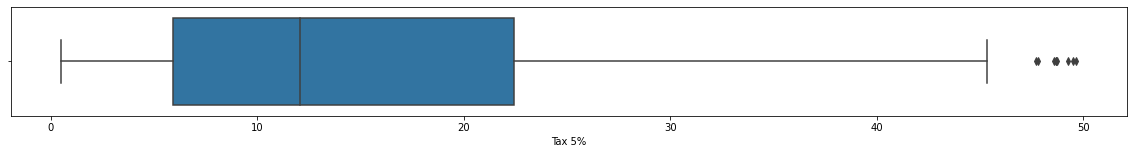

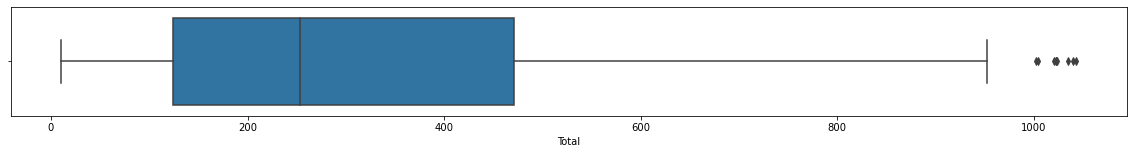

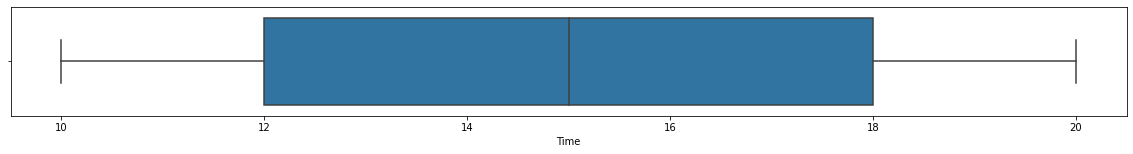

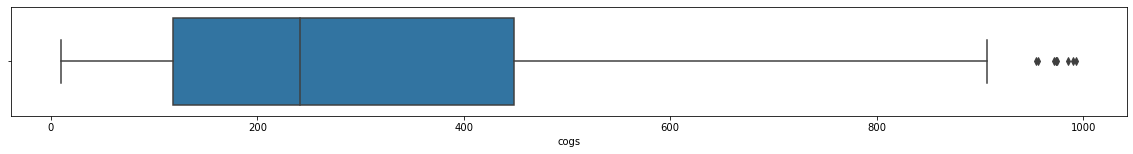

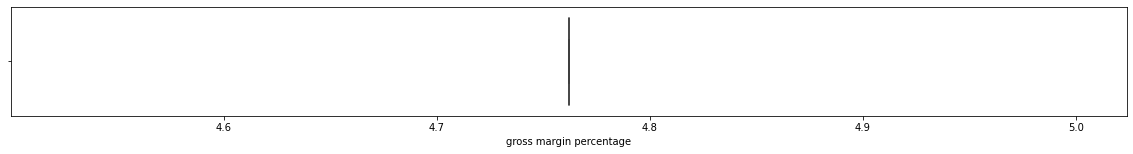

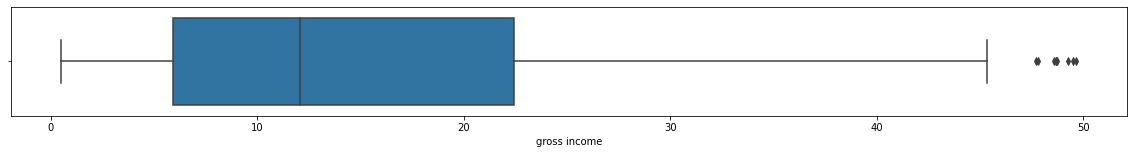

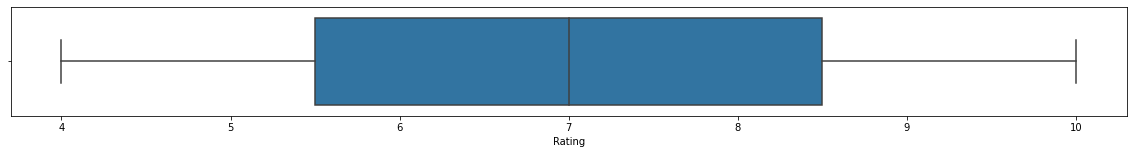

In [15]:
#Checking outliers with boxplot
for att in numerical_attributes:
    plt.figure(figsize = (20,2))
    sns.boxplot(x=data[att])
    plt.show()

As shown by the boxplots, there are some outliers on the dataset, but they won't be removed to prevent the loss of information and also this dataset is not so long.

## 5. Exploratory Data Analysis

In this section, it will be analized the relationship between the features each feature of the dataset

In [16]:
#Getting some basic statistics information
data.describe()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,14.910000,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,3.186857,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.000000,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,12.000000,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,15.000000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,18.000000,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,20.000000,993.00000,4.761905,49.650000,10.00000


The total sales of each branch is very similiar to each other. There aren't many differences in the sales of each branch.

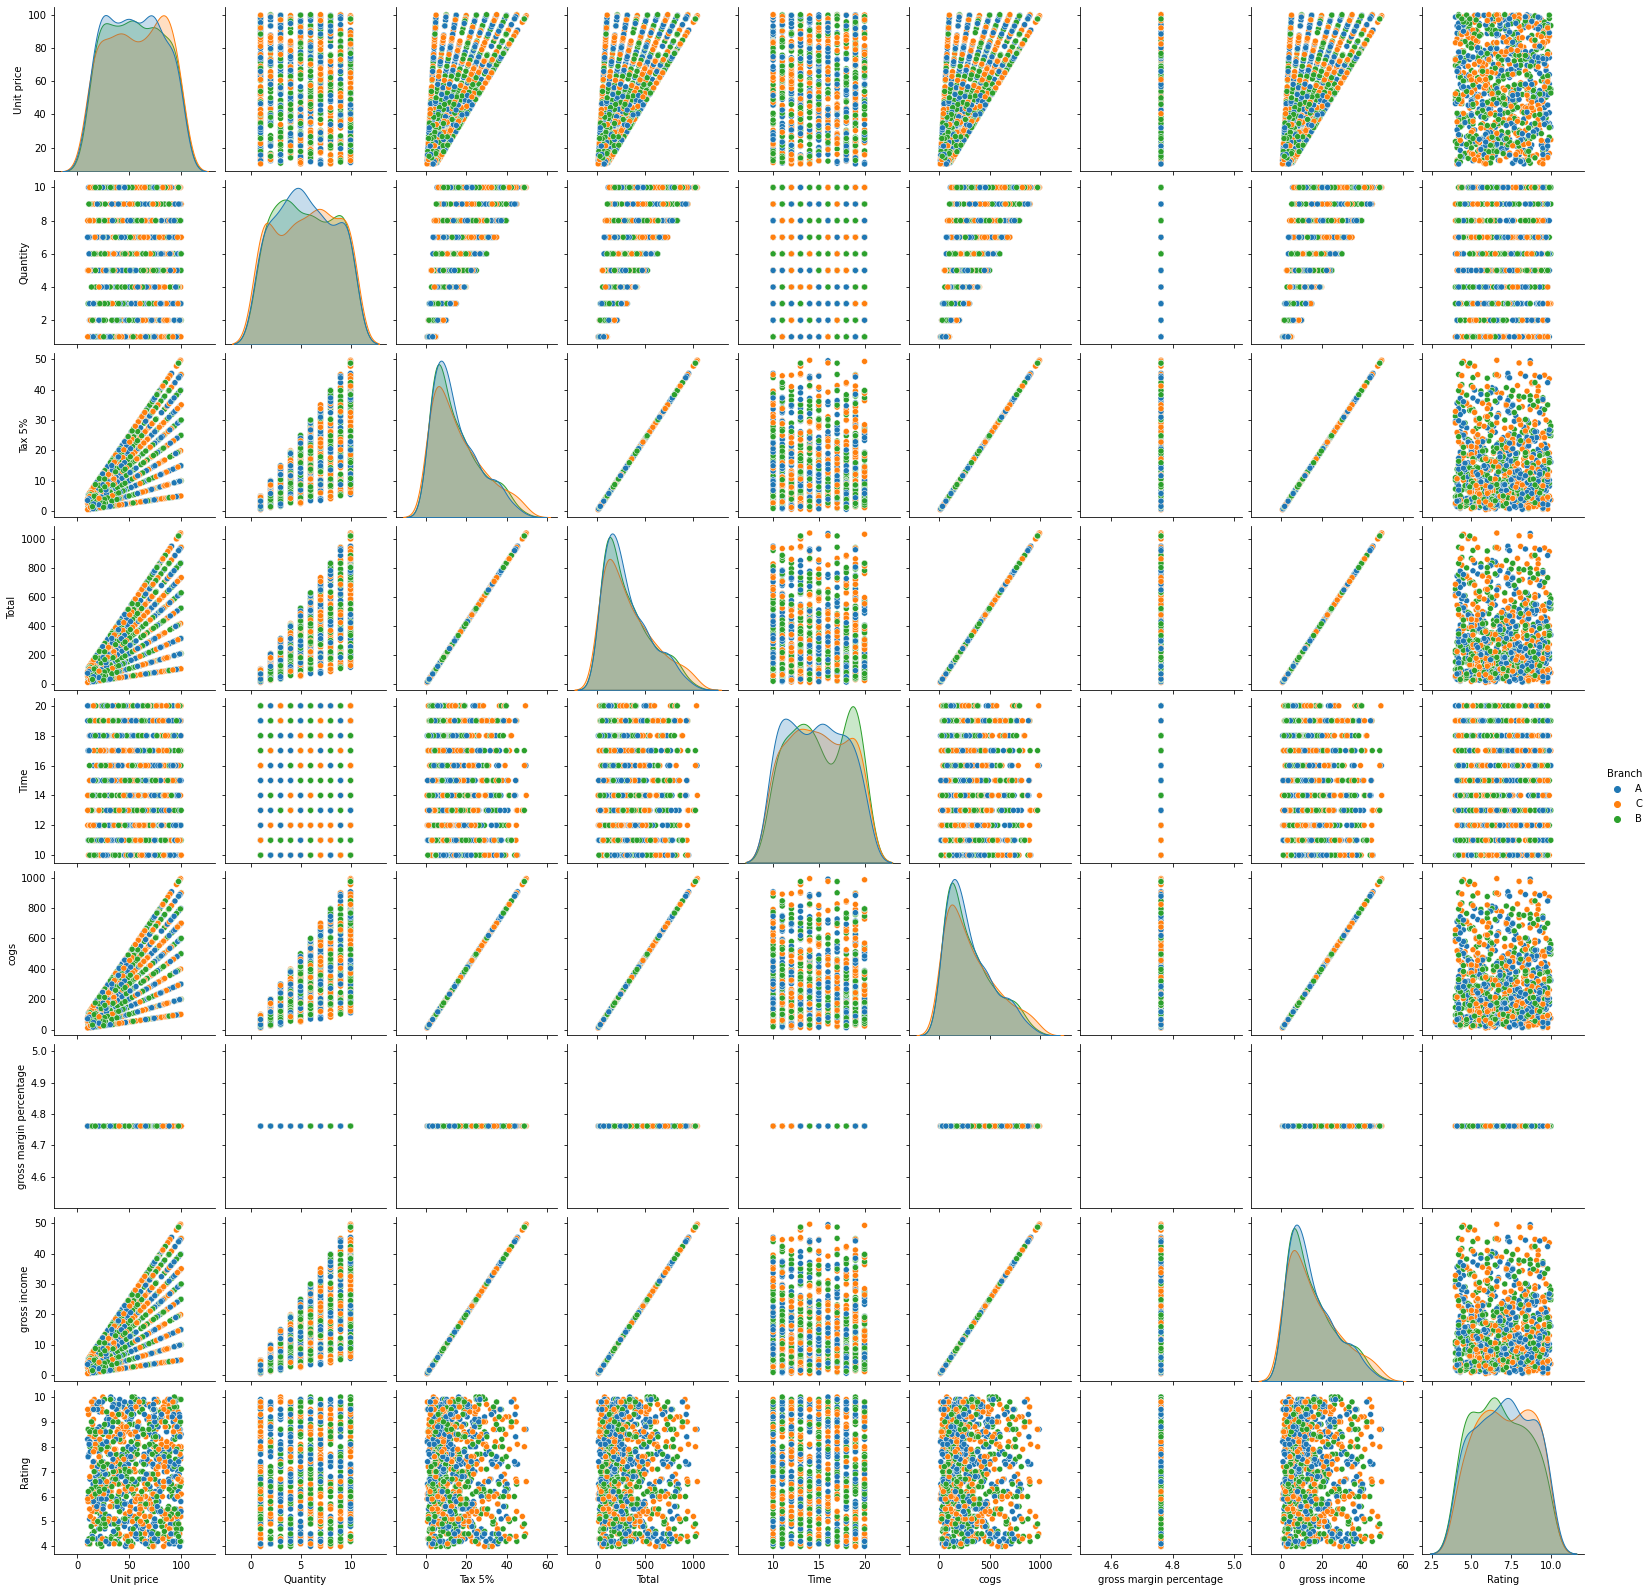

In [17]:
sns.pairplot(data, hue = 'Branch')

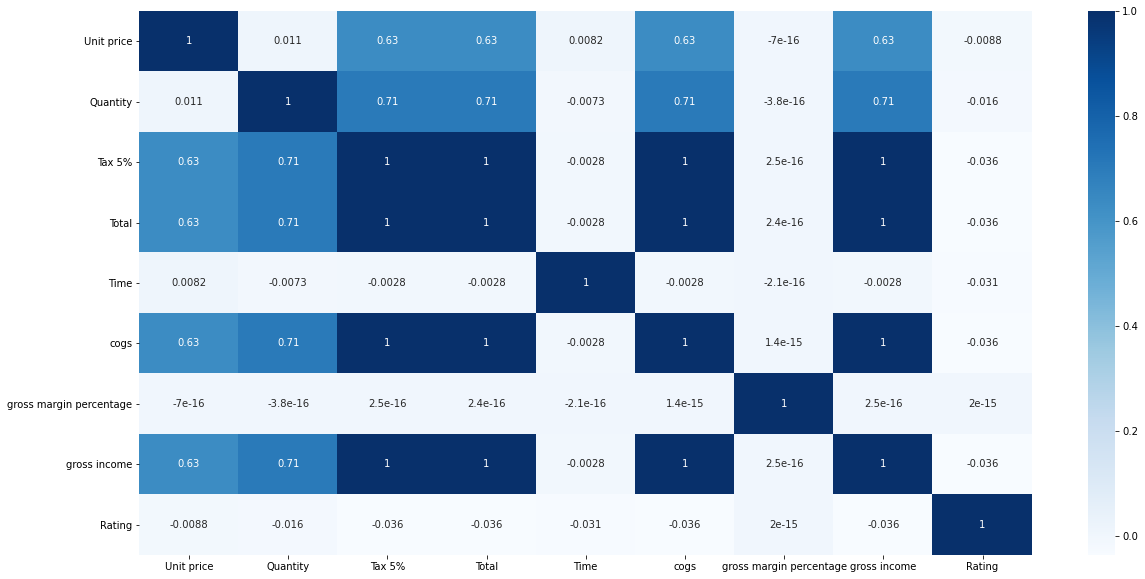

In [18]:
#Getting the correlation between numerical attributes
plt.figure(figsize =(20,10))
sns.heatmap(data.corr(),annot = True, cmap = 'Blues')

In [19]:
#Getting the columns with categorical information
categorical_attributes = data.select_dtypes(['object']).columns
categorical_attributes

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment',
       'WeekDay'],
      dtype='object')

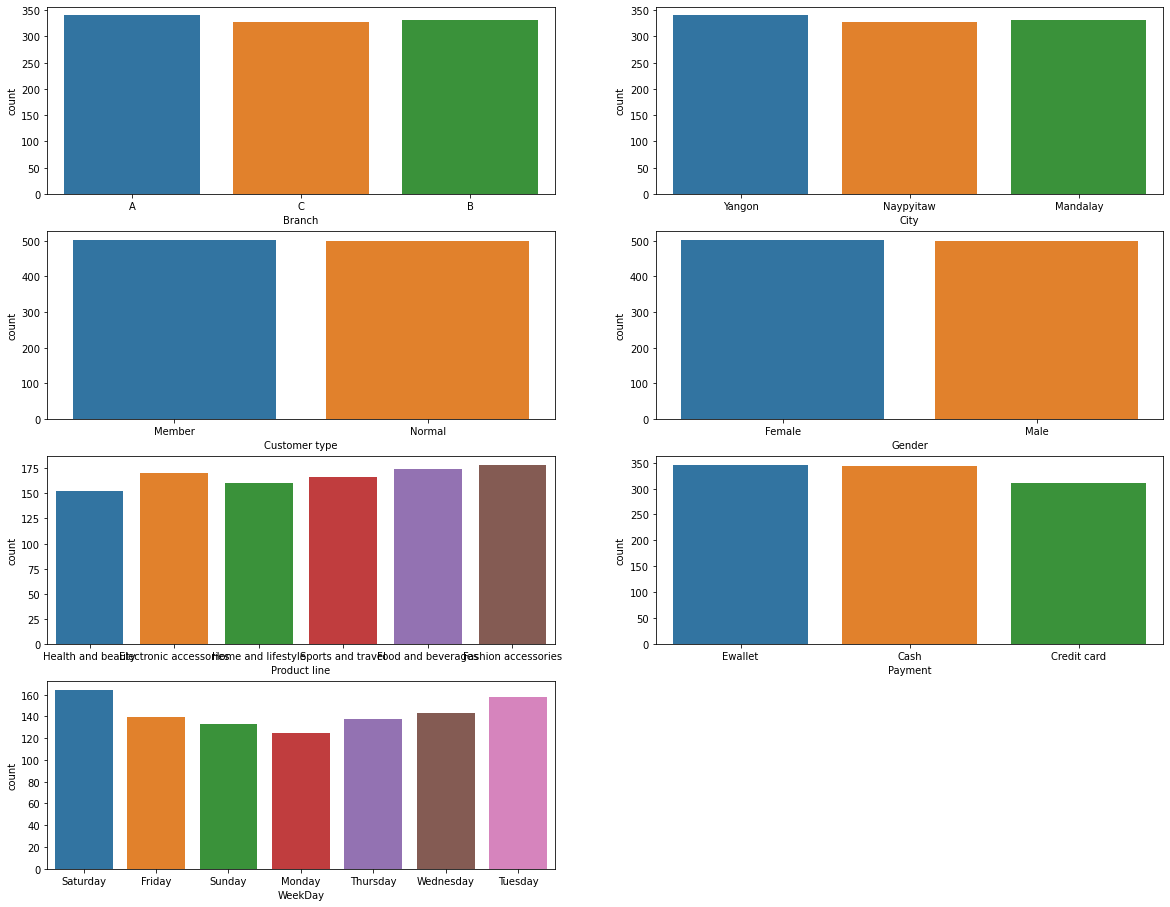

In [20]:
#Plotting the count of each categorical attributes
plt.figure(figsize=(20,20))
plt.subplot(5,2,1)
sns.countplot(x = data[categorical_attributes[0]])
plt.subplot(5,2,2)
sns.countplot(x = data[categorical_attributes[1]])
plt.subplot(5,2,3)
sns.countplot(x = data[categorical_attributes[2]])
plt.subplot(5,2,4)
sns.countplot(x = data[categorical_attributes[3]])
plt.subplot(5,2,5)
sns.countplot(x = data[categorical_attributes[4]])
plt.subplot(5,2,6)
sns.countplot(x = data[categorical_attributes[5]])
plt.subplot(5,2,7)
sns.countplot(x = data[categorical_attributes[6]])

By the information shown of the plot ahead, it can be observed:
- The number of sales of each Branch are very similar
- The number os sales on the cities are very similar
- The quantity of members customers and normal customers are similar
- There isn't difference on the gender of the customers
- Fashion acessories solds are a little bit higher than the others.
- Customers have a tendency to pay more with EWallet and Cash
- Saturday and Tuesday are the days with more daily sales.

For a better understanding of the  categorical variables in this problem, it will be divided in sections to each on them for deeper study. 

In [137]:
#Function to plot categorical relashionship
def cat_plot_relashionship(name):
    for col in categorical_attributes:
        if col == name:
            pass
        else:
            plt.figure(figsize = (20,5))
            ax = sns.countplot(data = data, y= col , hue = name )
            for p in ax.patches:
                     # get the height of each bar
                    width = p.get_width()
                    # adding text to each bar
                    ax.text(x = width*1.01 , # x-coordinate position of data label, padded to be in the middle of the bar
                    y = p.get_y()+(p.get_height()/2), # y-coordinate position of data label, padded 100 above bar
                    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
                    va = 'center') # sets horizontal alignment (ha) to center
            plt.legend(loc='upper left')
            plt.show()

### 5.1 Branch

In [138]:
#Getting the mean values of each Branch
data.groupby('Branch').mean()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
Branch,,,,,,,,,
A,54.780853,5.467647,14.874001,312.354031,14.667647,297.480029,4.761905,14.874001,7.027059
B,55.659277,5.481928,15.232024,319.872506,15.147590,304.640482,4.761905,15.232024,6.818072
C,56.609024,5.582317,16.052367,337.099715,14.920732,321.047348,4.761905,16.052367,7.072866


In [139]:
#Getting the sum value of each Branch
data.groupby('Branch').sum()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
Branch,,,,,,,,,
A,18625.49,1859,5057.1605,106200.3705,4987,101143.21,1619.047619,5057.1605,2389.2
B,18478.88,1820,5057.0320,106197.6720,5029,101140.64,1580.952381,5057.0320,2263.6
C,18567.76,1831,5265.1765,110568.7065,4894,105303.53,1561.904762,5265.1765,2319.9


To know if the mean total is statistic different from each branch, an ANOVA Test will be done.

In [163]:
#Anova preparation
idx = data.groupby(by='Branch').sum().index
dados = []
for i in idx:
    dados.append(data[data['Branch'] == i]['Total'])
                      
print(len(dados))

3


In [164]:
#Anova
f_score, p_value = f_oneway(dados[0],dados[1],dados[2])
print(p_value) 

0.413210174367147


As the p-value is higher than 0.05, it can be concluded that the mean are statistically the same.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


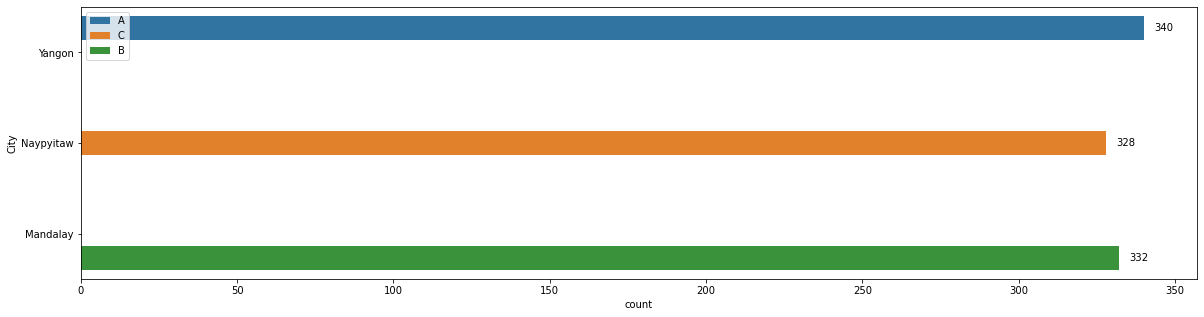

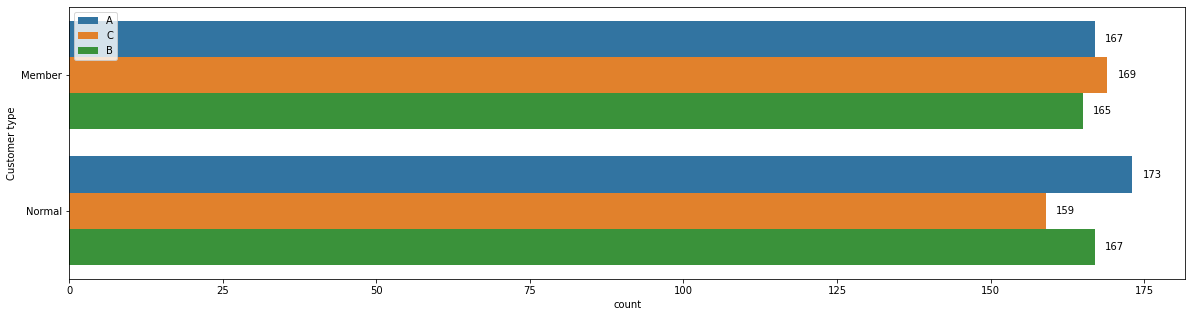

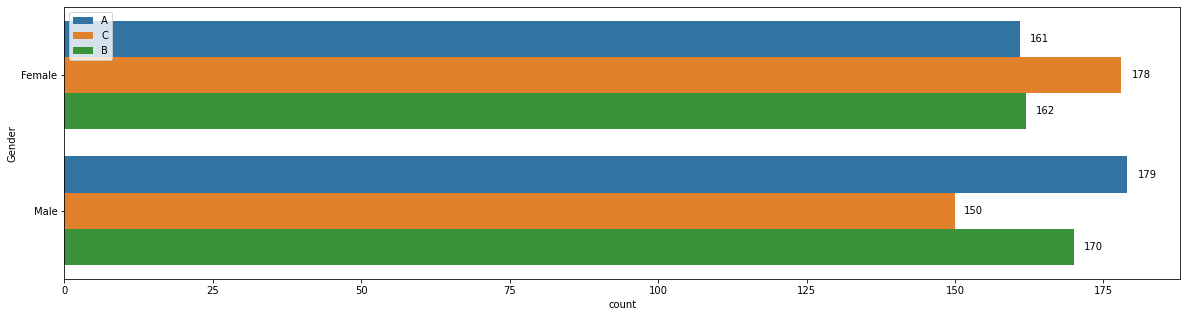

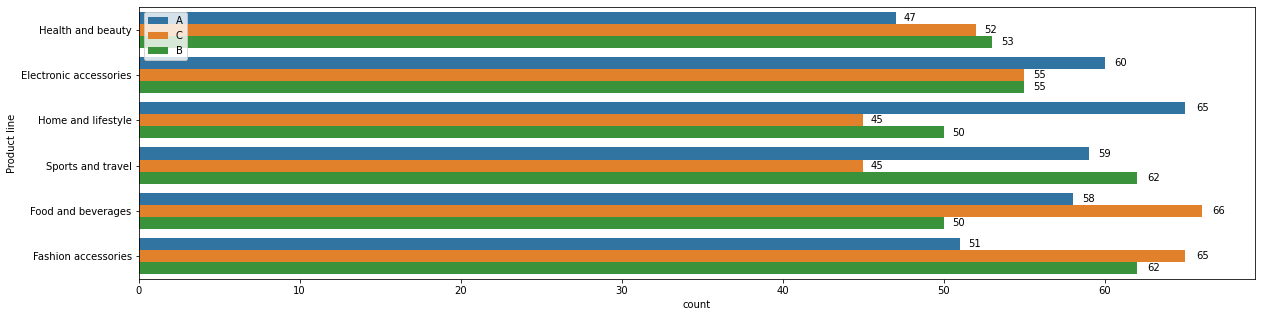

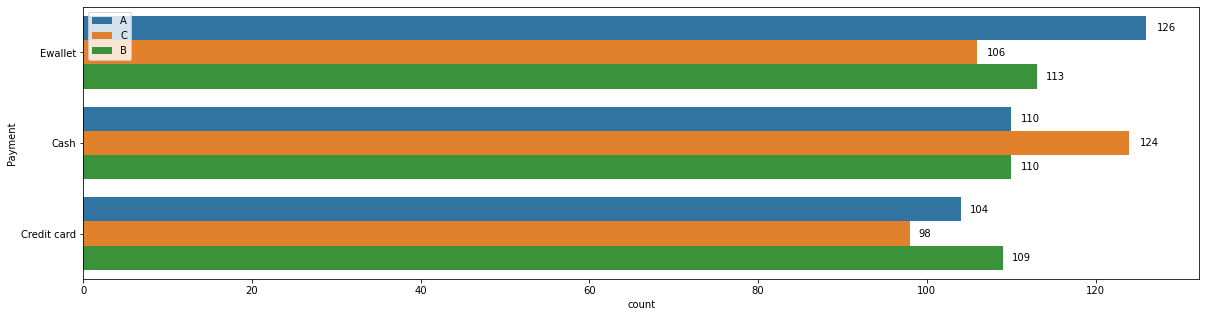

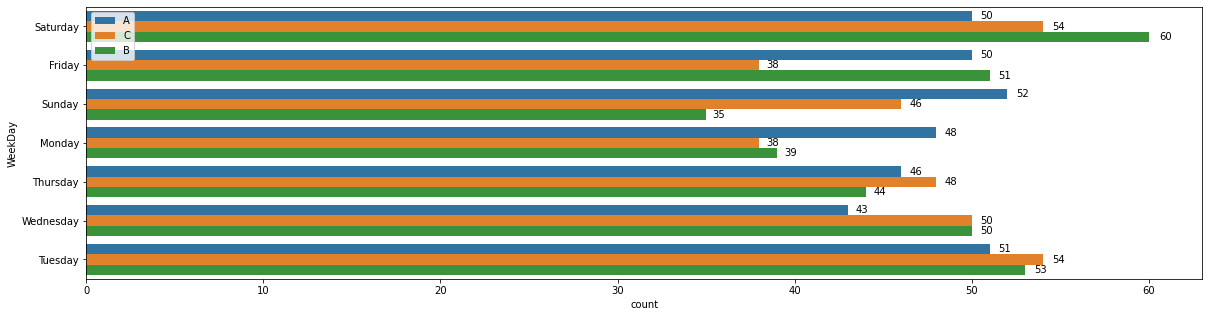

In [136]:
cat_plot_relashionship('Branch')

### 5.2 City

In [57]:
#Getting the mean values of each city
data.groupby('City').mean()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
City,,,,,,,,,
Mandalay,55.659277,5.481928,15.232024,319.872506,15.147590,304.640482,4.761905,15.232024,6.818072
Naypyitaw,56.609024,5.582317,16.052367,337.099715,14.920732,321.047348,4.761905,16.052367,7.072866
Yangon,54.780853,5.467647,14.874001,312.354031,14.667647,297.480029,4.761905,14.874001,7.027059


In [58]:
#Getting the sum values of each city
data.groupby('City').sum()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
City,,,,,,,,,
Mandalay,18478.88,1820,5057.0320,106197.6720,5029,101140.64,1580.952381,5057.0320,2263.6
Naypyitaw,18567.76,1831,5265.1765,110568.7065,4894,105303.53,1561.904762,5265.1765,2319.9
Yangon,18625.49,1859,5057.1605,106200.3705,4987,101143.21,1619.047619,5057.1605,2389.2


To know if the mean total is statistic different from each city, an ANOVA Test will be done.

In [165]:
#Anova preparation
idx = data.groupby(by='City').sum().index
dados = []
for i in idx:
    dados.append(data[data['City'] == i]['Total'])
                      
print(len(dados))

3


In [166]:
#Anova
f_score, p_value = f_oneway(dados[0],dados[1],dados[2])
print(p_value) 

0.413210174367147


As the p-value is higher than 0.05, it can be concluded that the mean are statistically the same.

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


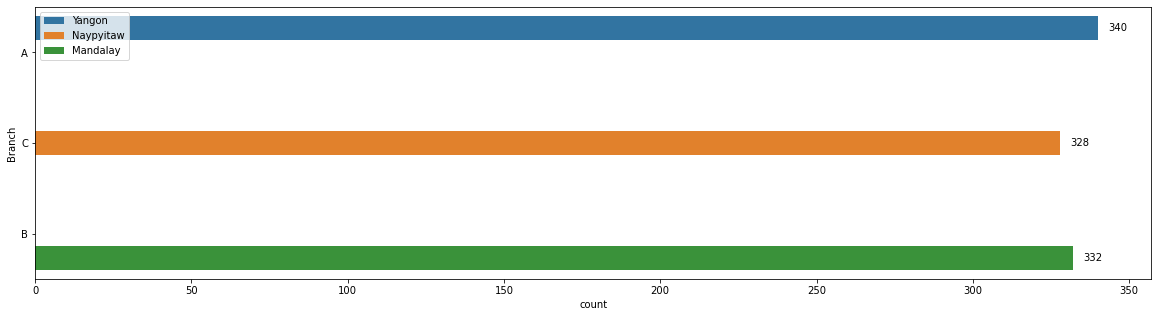

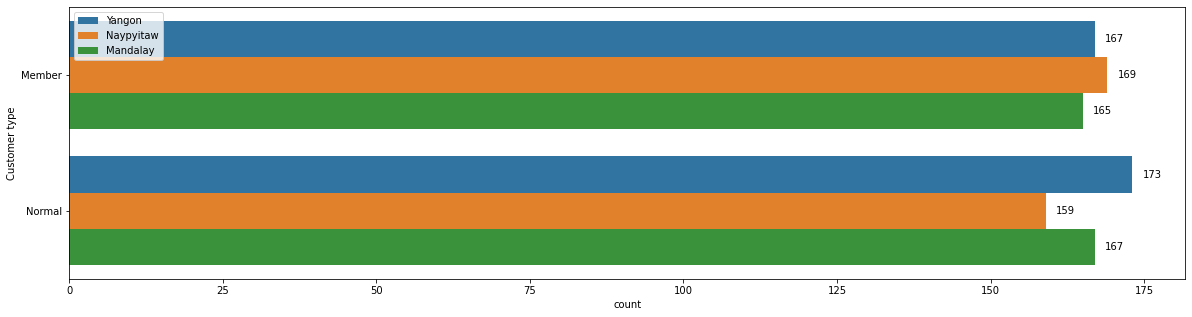

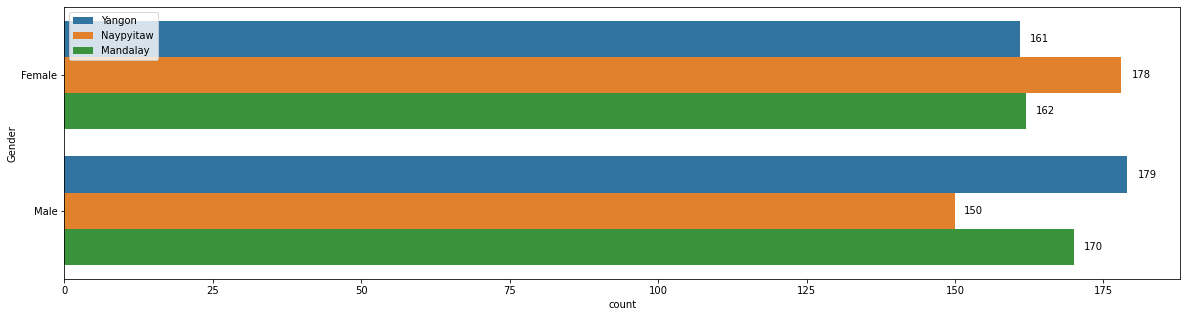

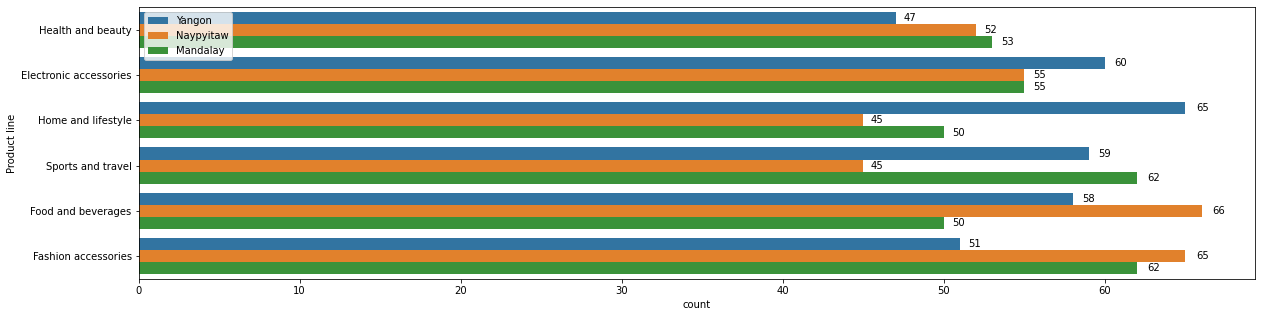

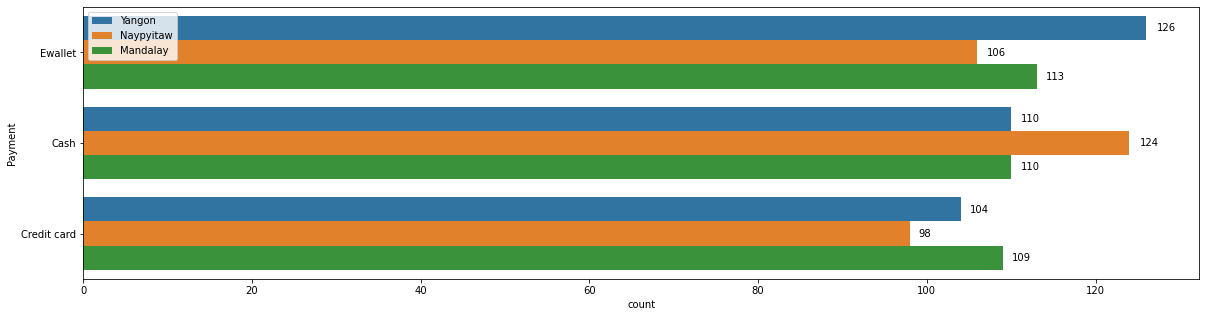

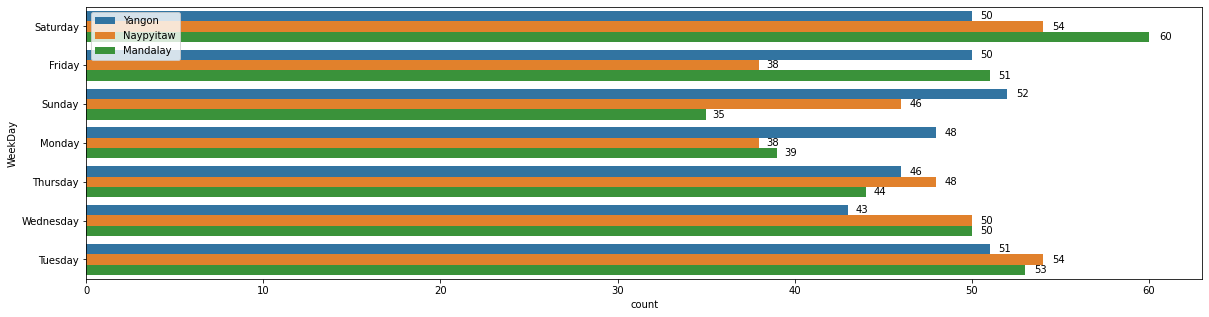

In [160]:
#Plotting categorical relashionship
cat_plot_relashionship('City')

### 5.3 Customer type

In [167]:
#Getting the mean values of each customer
data.groupby('Customer type').mean()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
Customer type,,,,,,,,,
Member,56.206986,5.558882,15.609110,327.791305,14.970060,312.182196,4.761905,15.609110,6.940319
Normal,55.135130,5.460922,15.148707,318.122856,14.849699,302.974148,4.761905,15.148707,7.005210


In [168]:
#Getting the sum values of each customer
data.groupby('Customer type').sum()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
Customer type,,,,,,,,,
Member,28159.70,2785,7820.164,164223.444,7500,156403.28,2385.714286,7820.164,3477.1
Normal,27512.43,2725,7559.205,158743.305,7410,151184.10,2376.190476,7559.205,3495.6


To know if the mean total is statistic different from each customer type, an ANOVA Test will be done.

In [170]:
#Anova preparation
idx = data.groupby(by='Customer type').sum().index
dados = []
for i in idx:
    dados.append(data[data['Customer type'] == i]['Total'])
                      
print(len(dados))

2


In [171]:
#Anova
f_score, p_value = f_oneway(dados[0],dados[1])
print(p_value) 

0.534394959614115


As the p-value is higher than 0.05, it can be concluded that the mean are statistically the same.

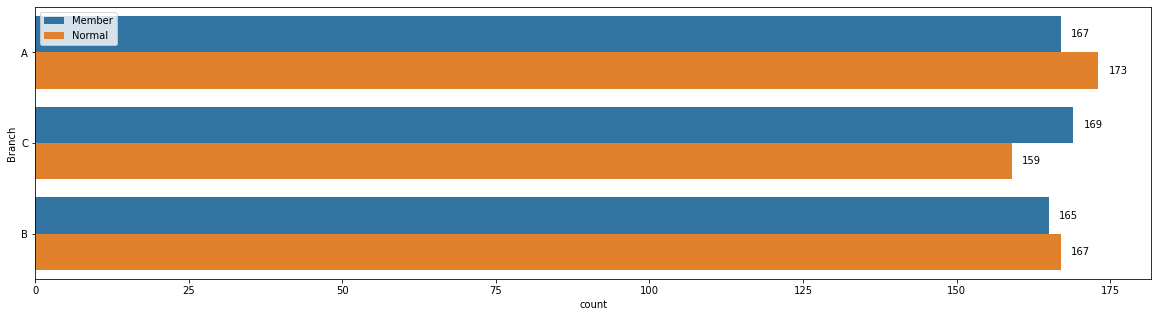

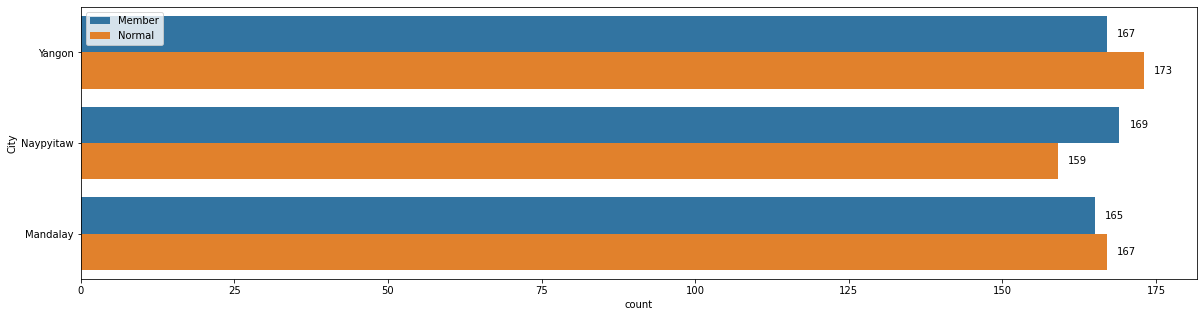

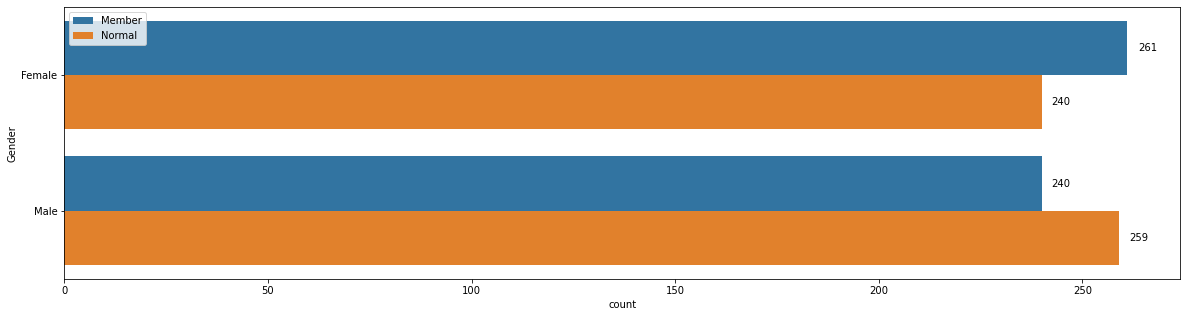

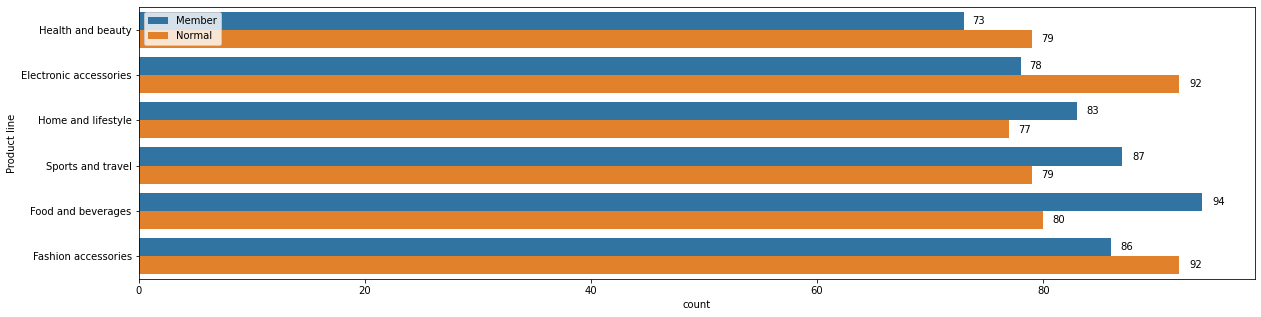

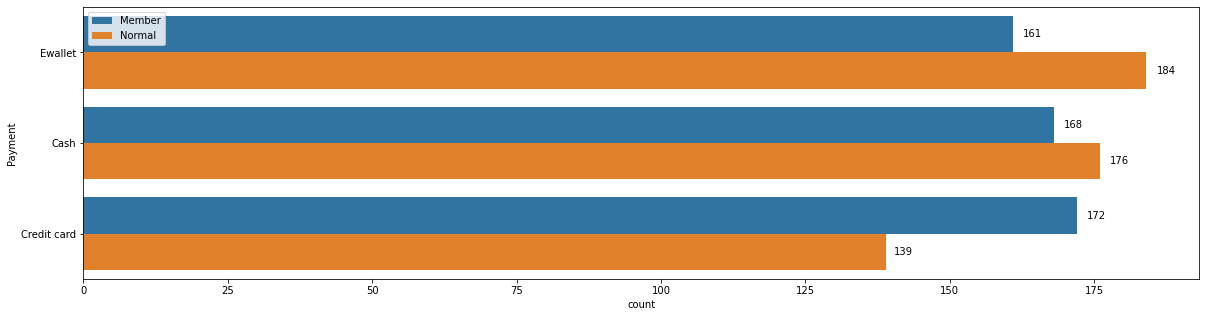

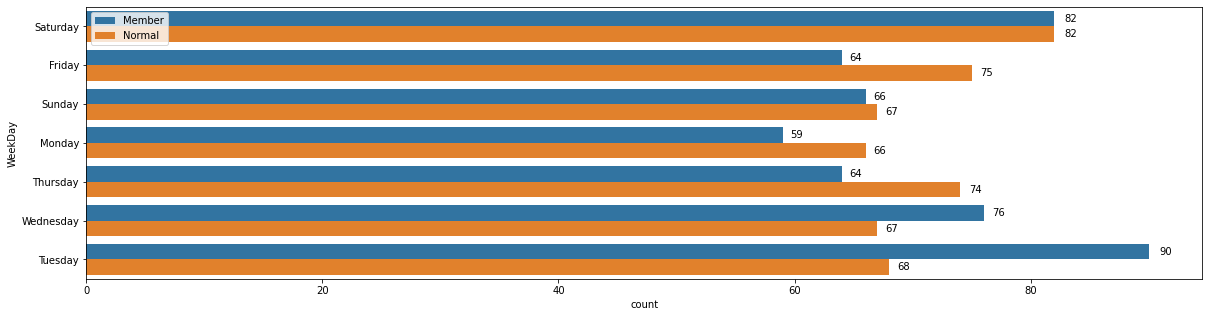

In [172]:
cat_plot_relashionship('Customer type')

### 5.4 Gender

In [174]:
#Getting the mean values of each gender
data.groupby('Gender').mean()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
Gender,,,,,,,,,
Female,55.263952,5.726547,15.956936,335.095659,14.642715,319.138723,4.761905,15.956936,6.964471
Male,56.081944,5.292585,14.799487,310.789226,15.178357,295.989739,4.761905,14.799487,6.980962


In [205]:
#Getting the sum values of each gender
data.groupby('Gender').sum()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
Gender,,,,,,,,,
Female,27687.24,2869,7994.425,167882.925,7336,159888.50,2385.714286,7994.425,3489.2
Male,27984.89,2641,7384.944,155083.824,7574,147698.88,2376.190476,7384.944,3483.5


To know if the mean total is statistic different from each city, an ANOVA Test will be done.

In [180]:
#Anova preparation
idx = data.groupby(by='Gender').sum().index
dados = []
for i in idx:
    dados.append(data[data['Gender'] == i]['Total'])
print(len(dados))

2


In [182]:
#Anova
f_score, p_value = f_oneway(dados[0],dados[1])
print(p_value) 

0.11810484577140822


As the p-value is higher than 0.05, it can be concluded that the mean are statistically the same.

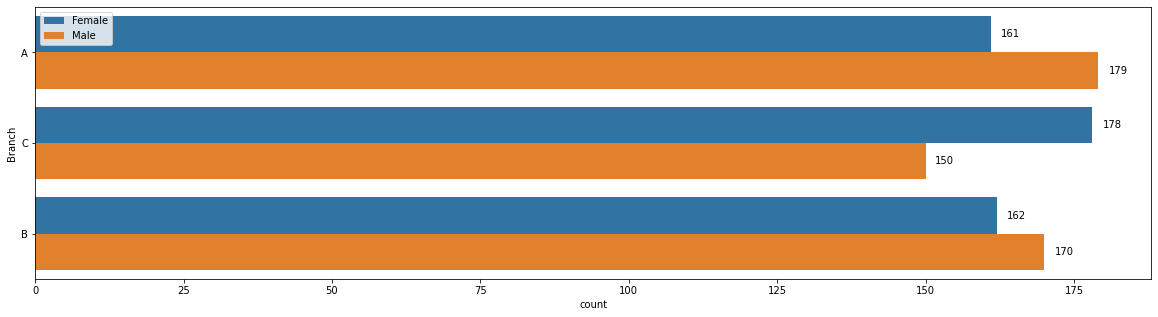

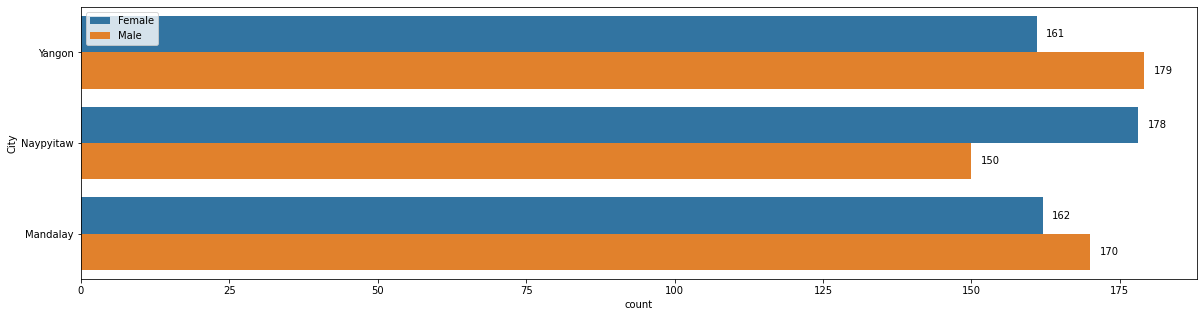

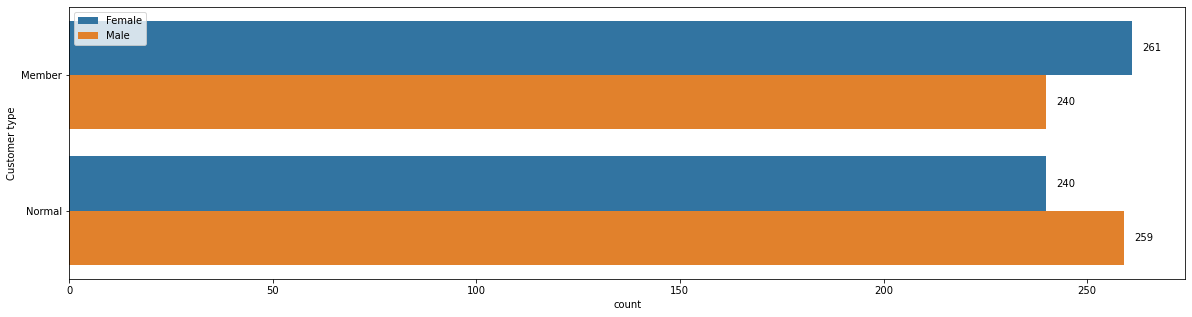

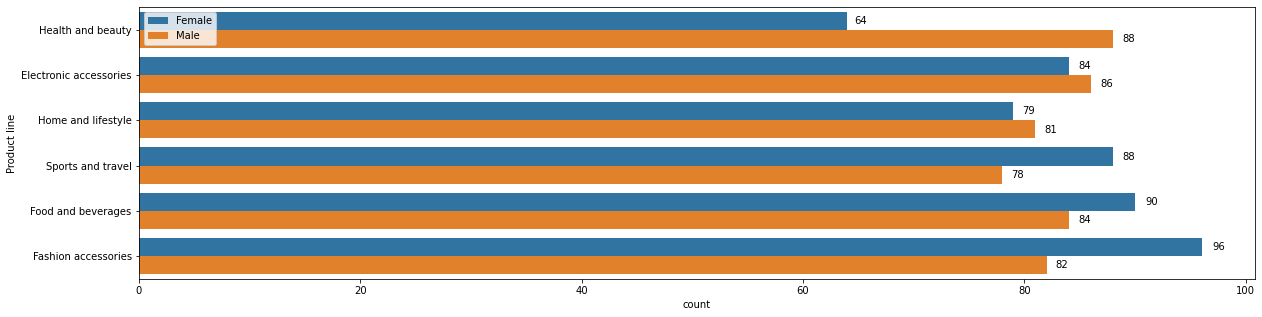

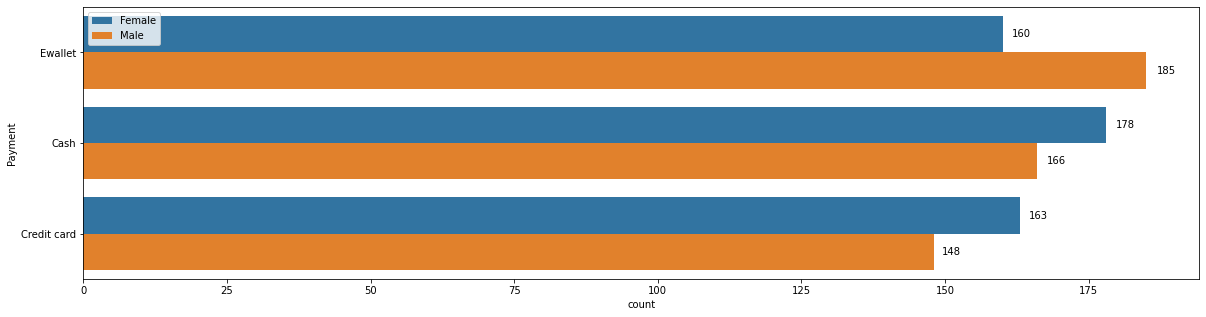

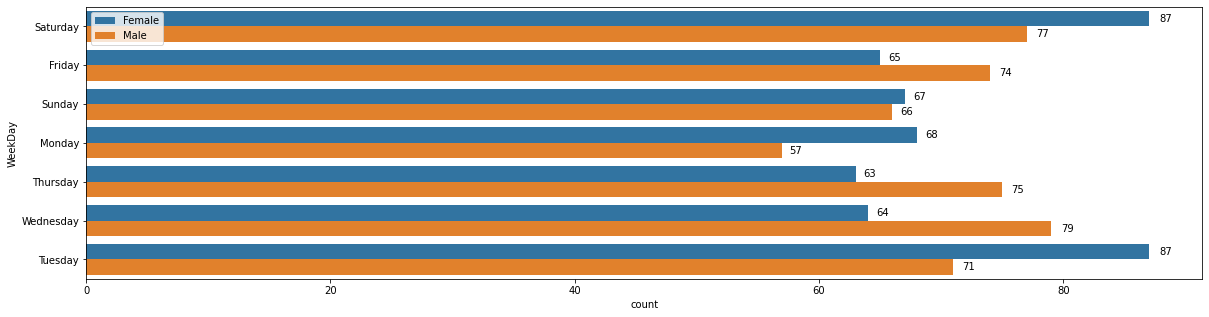

In [183]:
cat_plot_relashionship('Gender')

### 5.5 Product line

In [185]:
#Getting the mean values of each Product line
data.groupby('Product line').mean()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,,
Electronic accessories,53.551588,5.711765,15.220597,319.632538,14.988235,304.411941,4.761905,15.220597,6.924706
Fashion accessories,57.153652,5.067416,14.528062,305.089298,15.056180,290.561236,4.761905,14.528062,7.029213
Food and beverages,56.008851,5.471264,15.365310,322.671517,15.385057,307.306207,4.761905,15.365310,7.113218
Health and beauty,54.854474,5.618421,15.411572,323.643020,14.868421,308.231447,4.761905,15.411572,7.003289
Home and lifestyle,55.316937,5.693750,16.030331,336.636956,14.450000,320.606625,4.761905,16.030331,6.837500
Sports and travel,56.993253,5.542169,15.812630,332.065220,14.656627,316.252590,4.761905,15.812630,6.916265


In [186]:
#Getting the sum values of each Product line
data.groupby('Product line').sum()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
Product line,,,,,,,,,
Electronic accessories,9103.77,971,2587.5015,54337.5315,2548,51750.03,809.523810,2587.5015,1177.2
Fashion accessories,10173.35,902,2585.9950,54305.8950,2680,51719.90,847.619048,2585.9950,1251.2
Food and beverages,9745.54,952,2673.5640,56144.8440,2677,53471.28,828.571429,2673.5640,1237.7
Health and beauty,8337.88,854,2342.5590,49193.7390,2260,46851.18,723.809524,2342.5590,1064.5
Home and lifestyle,8850.71,911,2564.8530,53861.9130,2312,51297.06,761.904762,2564.8530,1094.0
Sports and travel,9460.88,920,2624.8965,55122.8265,2433,52497.93,790.476190,2624.8965,1148.1


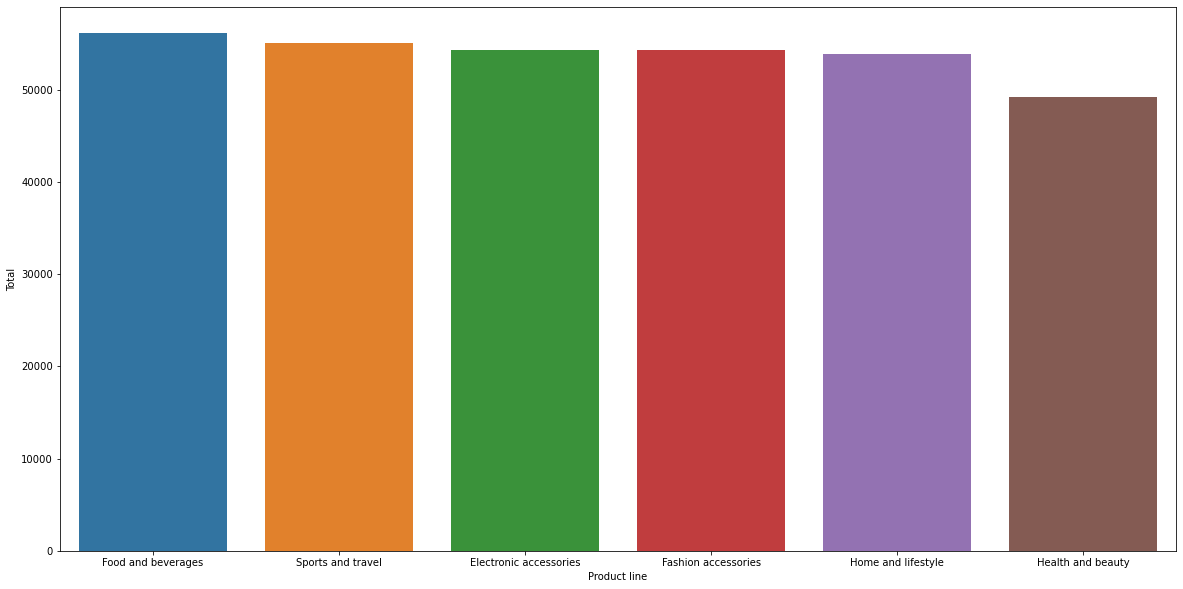

In [64]:
plt.figure(figsize=(20,10))
sns.barplot(x = data.groupby(by = 'Product line').sum()['Total'].sort_values(ascending = False).index, y =data.groupby(by = 'Product line').sum()['Total'].sort_values(ascending = False))

To know if the mean total is statistic different from each Product line, an ANOVA Test will be done.

In [187]:
#Anova preparation
idx = data.groupby(by='Product line').sum().index
dados = []
for i in idx:
    dados.append(data[data['Product line'] == i]['Total'])
print(len(dados))


6


In [188]:
#Anova
f_score, p_value = f_oneway(dados[0],dados[1],dados[2],dados[3],dados[4],dados[5])
print(p_value) 

0.8900398045912835


As the p-value is higher than 0.05, it can be concluded that the mean are statistically the same.

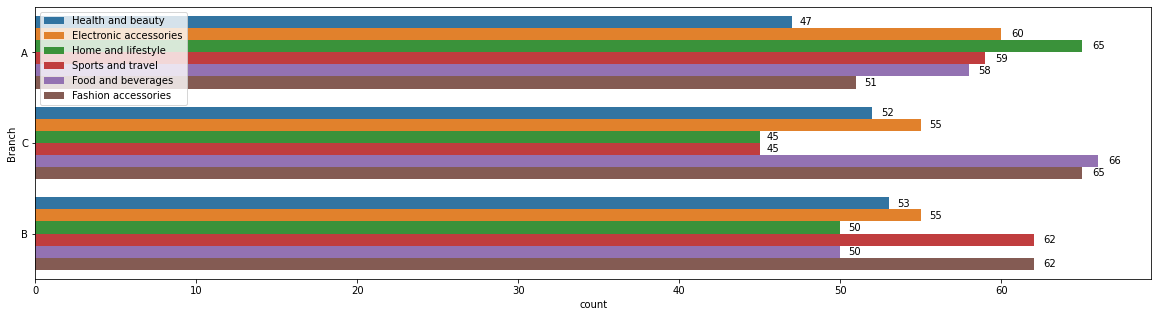

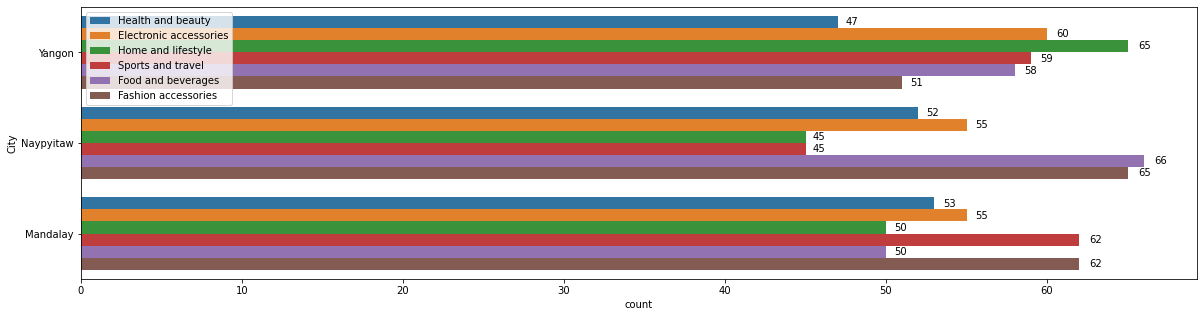

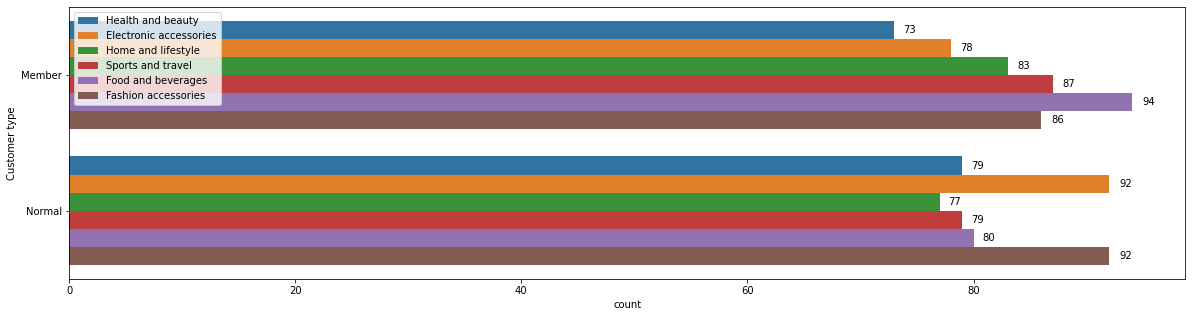

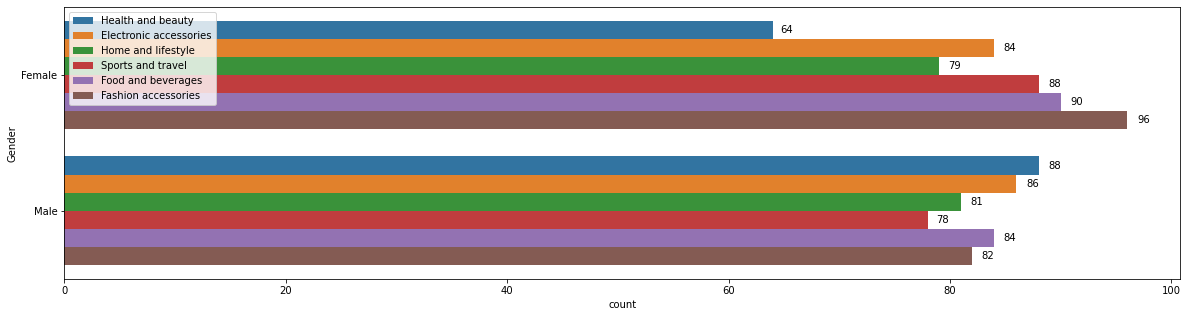

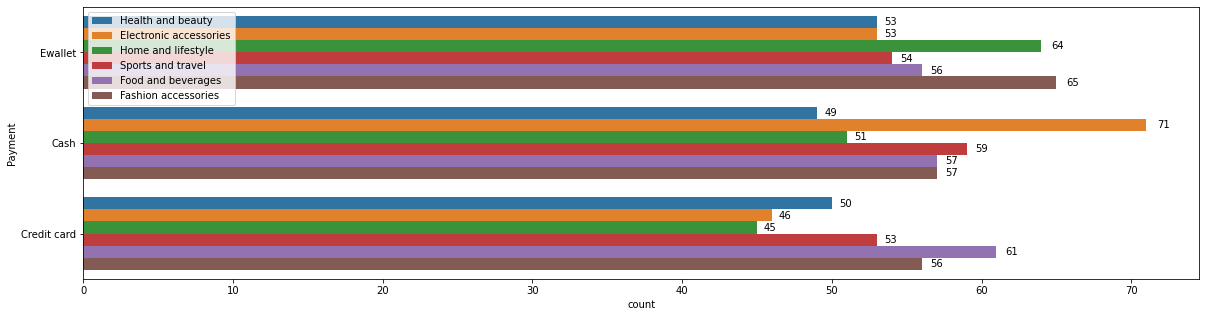

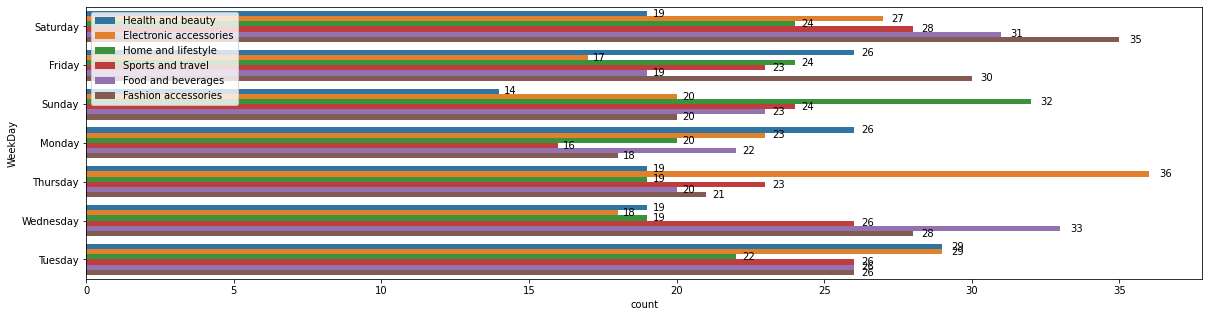

In [194]:
cat_plot_relashionship('Product line')

### 5.6 Payment

In [190]:
#Getting the mean values of each Payment
data.groupby('Payment').mean()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
Payment,,,,,,,,,
Cash,56.758983,5.511628,15.532471,326.181890,14.712209,310.649419,4.761905,15.532471,6.970058
Credit card,54.394469,5.536977,15.429042,324.009878,14.961415,308.580836,4.761905,15.429042,7.003215
Ewallet,55.740174,5.484058,15.181933,318.820600,15.060870,303.638667,4.761905,15.181933,6.947826


In [191]:
#Getting the sum values of each Payment
data.groupby(by ='Payment').sum()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
Payment,,,,,,,,,
Cash,19525.09,1896,5343.170,112206.570,5061,106863.40,1638.095238,5343.170,2397.7
Credit card,16916.68,1722,4798.432,100767.072,4653,95968.64,1480.952381,4798.432,2178.0
Ewallet,19230.36,1892,5237.767,109993.107,5196,104755.34,1642.857143,5237.767,2397.0


To know if the mean total is statistic different from each payment, an ANOVA Test will be done.

In [192]:
#Anova preparation
idx = data.groupby(by='Payment').sum().index
dados = []
for i in idx:
    dados.append(data[data['Payment'] == i]['Total'])
print(len(dados))

3


In [193]:
#Anova
f_score, p_value = f_oneway(dados[0],dados[1],dados[2])
print(p_value) 

0.9221037792354058


As the p-value is higher than 0.05, it can be concluded that the mean are statistically the same.

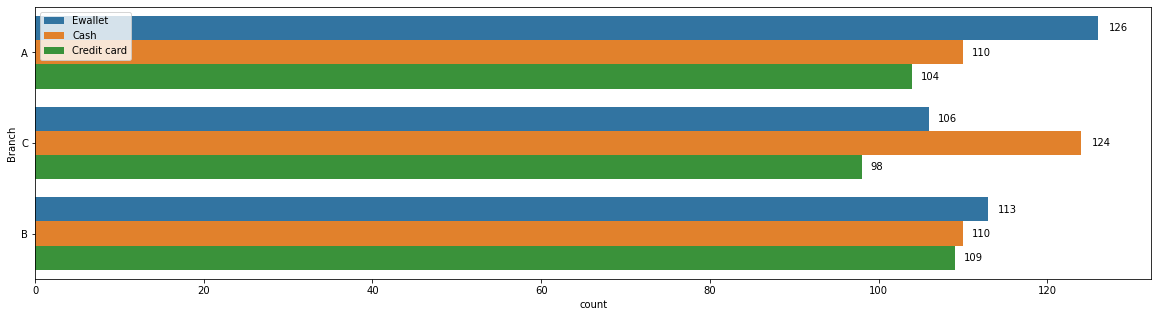

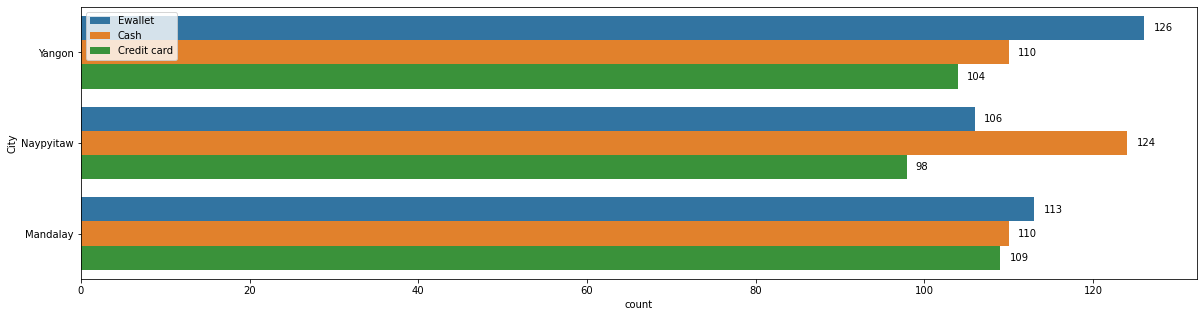

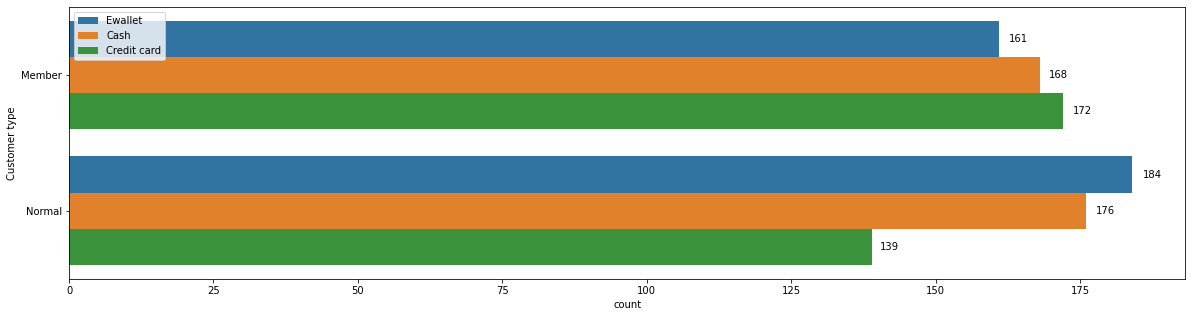

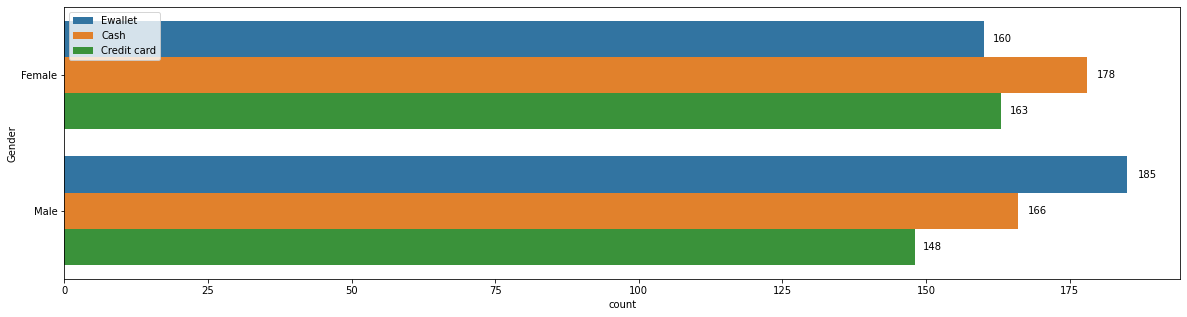

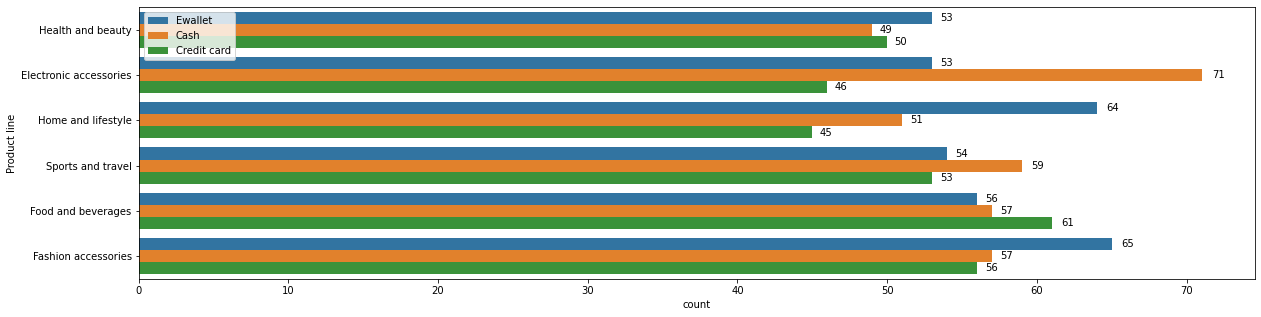

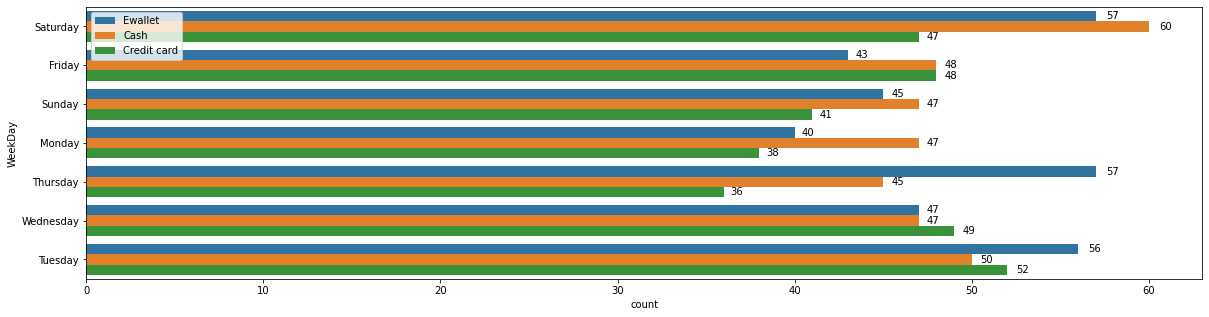

In [195]:
cat_plot_relashionship('Payment')

### 5.7 WeekDay

In [198]:
#Getting the mean values of each WeekDay
data.groupby(by ='WeekDay').mean()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
WeekDay,,,,,,,,,
Friday,55.097266,5.453237,15.048421,316.016838,14.690647,300.968417,4.761905,15.048421,7.076259
Monday,57.728000,5.104000,14.437744,303.192624,14.912000,288.754880,4.761905,14.437744,7.153600
Saturday,56.913049,5.603659,16.295241,342.200058,15.201220,325.904817,4.761905,16.295241,6.901829
Sunday,54.517970,5.849624,15.917613,334.269868,15.037594,318.352256,4.761905,15.917613,7.011278
Thursday,56.959058,5.471014,15.648464,328.617739,14.550725,312.969275,4.761905,15.648464,6.889855
Tuesday,54.837215,5.455696,15.516047,325.836997,14.974684,310.320949,4.761905,15.516047,7.003165
Wednesday,53.764685,5.594406,14.562483,305.812133,14.944056,291.249650,4.761905,14.562483,6.805594


In [199]:
#Getting the sum values of each WeekDay
data.groupby(by ='WeekDay').sum()

,Unit price,Quantity,Tax 5%,Total,Time,cogs,gross margin percentage,gross income,Rating
WeekDay,,,,,,,,,
Friday,7658.52,758,2091.7305,43926.3405,2042,41834.61,661.904762,2091.7305,983.6
Monday,7216.00,638,1804.7180,37899.0780,1864,36094.36,595.238095,1804.7180,894.2
Saturday,9333.74,919,2672.4195,56120.8095,2493,53448.39,780.952381,2672.4195,1131.9
Sunday,7250.89,778,2117.0425,44457.8925,2000,42340.85,633.333333,2117.0425,932.5
Thursday,7860.35,755,2159.4880,45349.2480,2008,43189.76,657.142857,2159.4880,950.8
Tuesday,8664.28,862,2451.5355,51482.2455,2366,49030.71,752.380952,2451.5355,1106.5
Wednesday,7688.35,800,2082.4350,43731.1350,2137,41648.70,680.952381,2082.4350,973.2


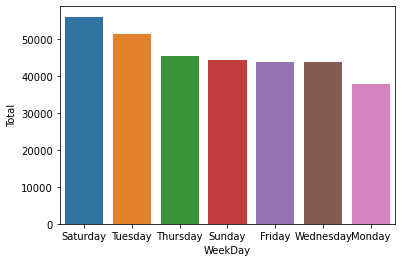

In [61]:
sns.barplot(x = data.groupby(by = 'WeekDay').sum()['Total'].sort_values(ascending = False).index, y =data.groupby(by = 'WeekDay').sum()['Total'].sort_values(ascending = False))

To know if the mean total is statistic different from each city, an ANOVA Test will be done.

In [201]:
#Anova preparation
idx = data.groupby(by='WeekDay').sum().index
dados = []
for i in idx:
    dados.append(data[data['WeekDay'] == i]['Total'])
print(len(dados))

7


In [202]:
#Anova
f_score, p_value = f_oneway(dados[0],dados[1],dados[2],dados[3],dados[4],dados[5],dados[6])
print(p_value) 

0.8104904885166633



As the p-value is higher than 0.05, it can be concluded that the mean are statistically the same.

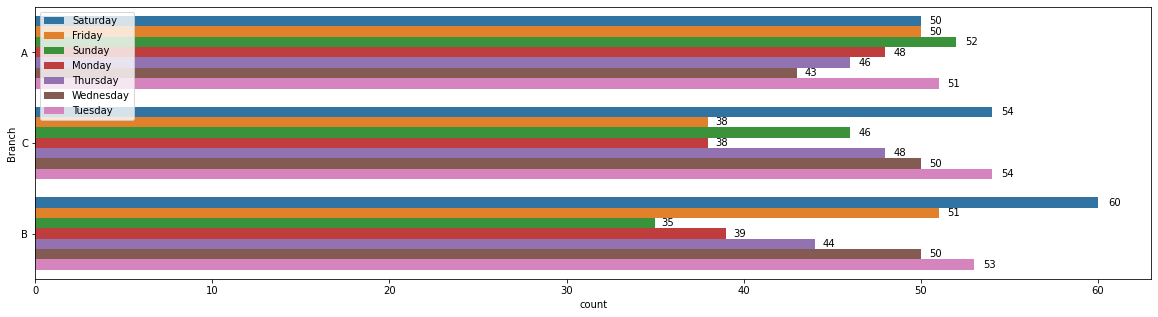

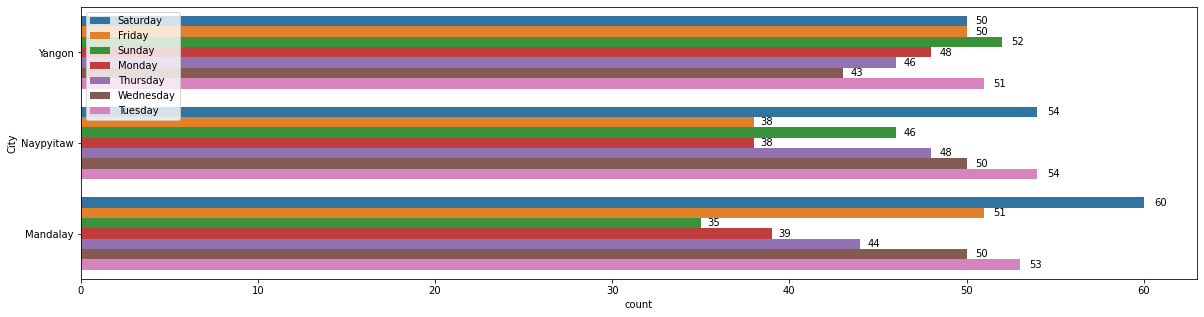

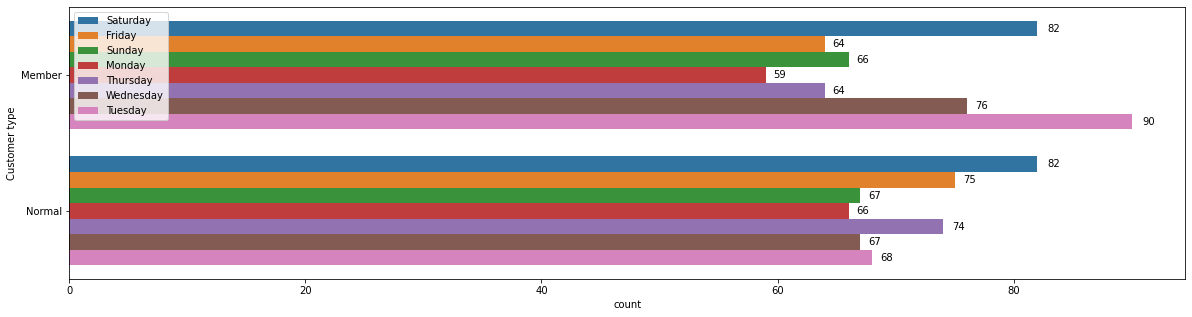

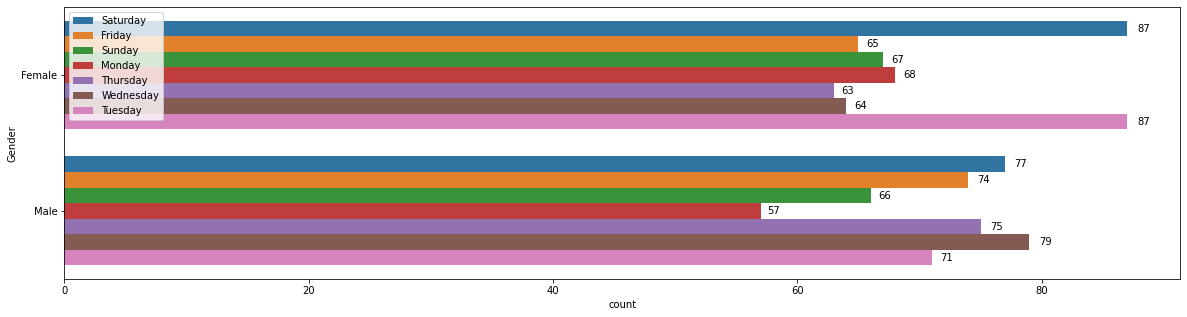

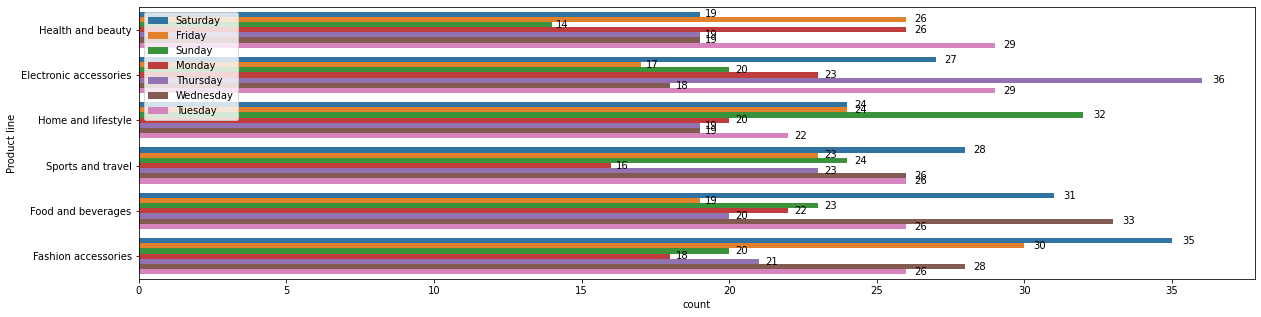

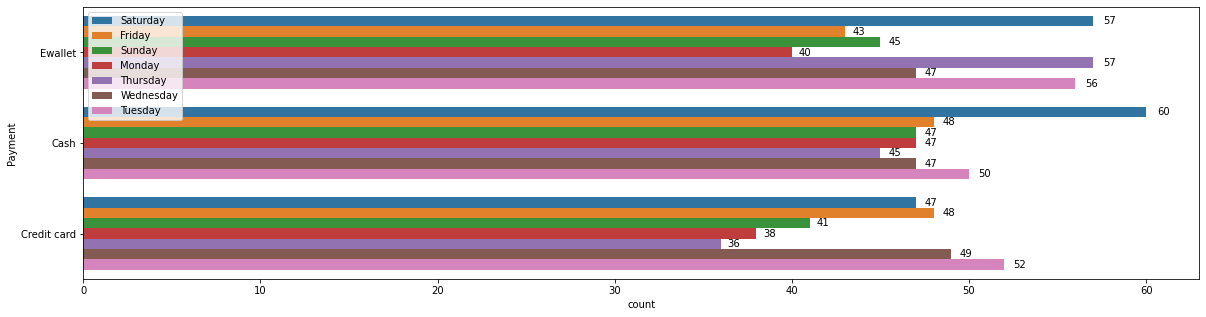

In [203]:
cat_plot_relashionship('WeekDay')

Throught all the plots and statistical methods used above, it was possible to get the following Insights:

Numerical Variables:
- Many variables have linear relationship due to they are true percentages values of each other.
- The other variables are not correlated.


Categorical Variables:
- Branch: Between each other, doesn't have much statistical difference. Branch A sells more home and lifestyle products than others. Branch B sells more food and beverages than others. On Branch A customer pay more with Ewallet. On Sunday and Monday Branch A sells more.


- City: Yangon sells more Home and life styles than others. On Monday, Yangon sells more too, but on Saturday Mandalay sells more.


- Customer type: Normal customers buy more eletronics acessories than Members but Members buy more food and beverages. Members pay more with credit card than members, but Normal customers pay more with Ewallet.


- Gender: Female buys more Health and beauty products than Male. Male pays more with EWallet. Males buy more on Tuesday and Saturday, but female buys more in Wednesday, Thursday and Friday.


- Product Line: Fashion acessories brings is the MVP product. Electronic acessories are normally sold on cash and on Thursday. On Saturday the most sold item is Fashion Acessories


- Payment: On Thursday, normally people pay with EWallet.


- WeekDay: All the conclusios of this category were made in the other categories due to the relashionship.

## 6. Conclusions

Understand the supermarket sales is a very important task to any owner of this type of business. Along all the steps of this project, it was possible to understand that are relashionship between each variable of the presented dataset and how valuable they are to the profit of the company.

A data analysis project in a business that has so many information is essencial, due to is would very hard to get this insights without a trained person on this area. Also thought all this analysis, the business of the company can raise if the owner use all the informations contained on this project.